# Анализ рынка игровой индустрии

Наша задача проанализировать рынок компьютерных игры и . Из открытых источников нам доступны данные о продажах игры за период с 1980 года по 2016 год.

### Откроем файл с данными и изучим общую информацию. 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats as st
import warnings
warnings.simplefilter('ignore')
df = pd.read_csv('games.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
display(df.head(5))
display(df.tail(5))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [11]:
df.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

**Вывод**

Для понимания данных мы вывели общую информацию о полученном датасете и первые и последние 5 строк. У нас в данных есть пропущенные значение и некоторым столбцам нужно будет изменить тип данных для удобства работы. Также мы нашли странное значение в стобце **User_Score**, а именно значение **tbd**. Эта абривиатура означает, что рейтинг еще не определен, дословный перевод абривиатуры - "Подлежит определению". Данное значение, нужно будет заменить. Подготовим примерный план на предобработку данных:

| Столбец        | Замена типа           | Пропуски  |
| ------------- |:-------------:| -----:|
| Year_of_Release    | int |   заменим на 2036, чтобы значения выбивались(отсылка в Дудю) |
| User_Score  | float64     |    значаение tbd заменим на NaN |
| Rating  | не изменим    |    значаение NaN заменим на RP |

Остальные пропущенные значения заменять не будем, так как мы не может знать какие именно пропущенны значения и предугадать их мы не можем. Именно поэтому оставим их без изменений.


### Предобработка данных

In [12]:
df.columns = df.columns.str.lower()
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [13]:
df['year_of_release'] = df['year_of_release'].fillna(2036)
df['year_of_release'] = df['year_of_release'].astype(int)
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Мы заменили, пропущенные значения на 2036, чтобы при дальнейшем анализе эти значения выбивались.

In [14]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df['user_score'] = df['user_score'].astype(float)
df['rating'] = df['rating'].fillna('RP')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Значение **tbd** в стобце **user_score** мы заменили на Nan, потому что оценка этих игр еще не определена и ее никто не знает.

In [15]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


Для дальнейшего исследования мы создали новый столбец **total_sales** с суммарными продажами по всем регионам

In [16]:
print('Кол-во дубликатов:', df.duplicated().sum())

Кол-во дубликатов: 0


### Исследовательский анализ данных

#### Посмотрим сколько игры выпускалось в разные года

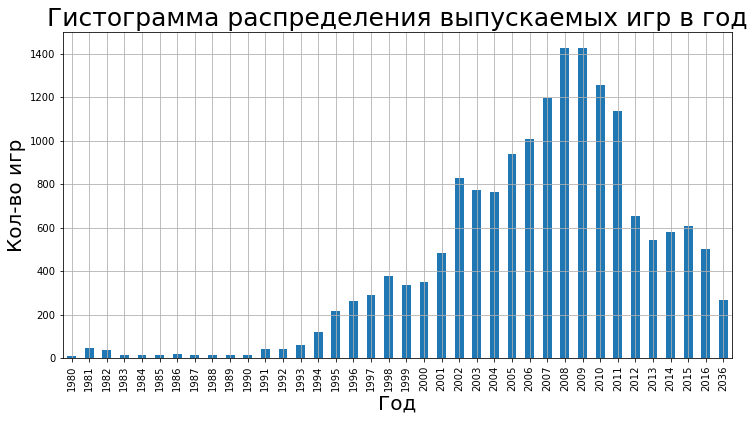

In [17]:
year_gist = df.pivot_table(index = 'year_of_release', values = 'platform', aggfunc = 'count')
year_gist.plot(y = 'platform', kind = 'bar', grid = True, legend = False, figsize = (12,6))
plt.title('Гистограмма распределения выпускаемых игр в год', loc = 'center', fontsize = 25)
plt.ylabel('Кол-во игр', size = 20)
plt.xlabel('Год', size = 20)
plt.show()

По получившейся гистограмме мы видим следующее. В 1980 году выпуск игры был небольшой, с 1995 года начинается рост игровой индустрии, в 2008 году невероятный всплеск выпуска игры на разных платформах. Возможно, это связано с большими прорывами в геймдеве в те года. далее идет спад. Возможная причина спада, это появление смартфонов и переход на мобильные платформы. Нас интересует ответ на вопрос какими могут быть продажи игры на 2017 год. Предварительно предположим, что можно изучить период с 2010 года по 2016. Для цели нашего исследования.

#### Посмотрим как менялись продажи по разным платформам и выберем актуальный период для нашего дальнейшего исследования

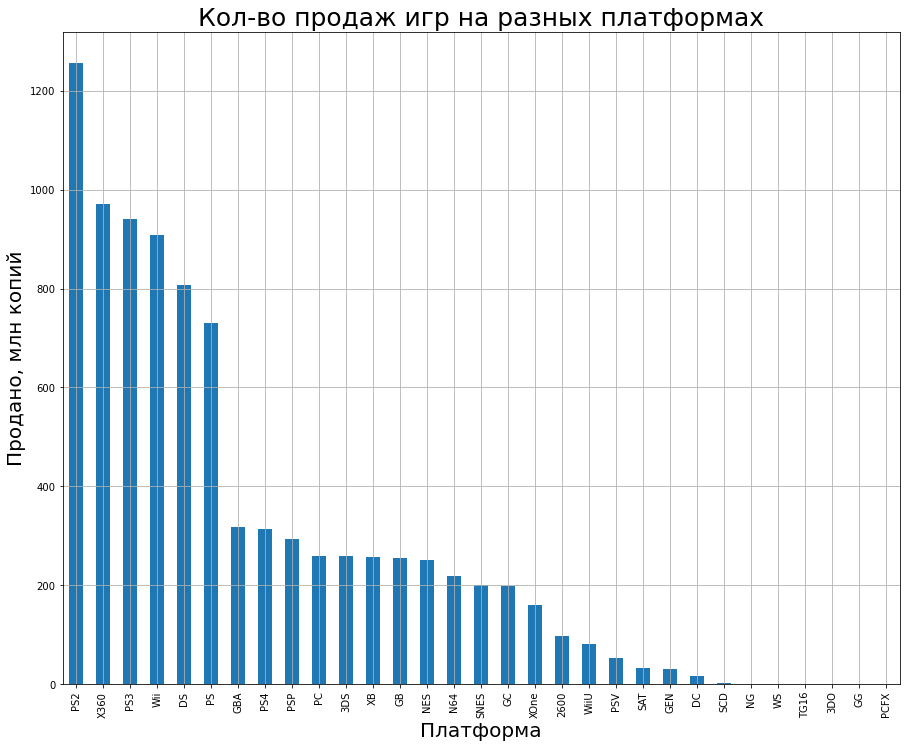

In [18]:
sales_platforms = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(
    by = 'total_sales', ascending = False)
sales_platforms.head(5)
sales_platforms.plot(y = 'total_sales', kind = 'bar', grid = True,legend = False, figsize = (15,12))
plt.title('Кол-во продаж игр на разных платформах', loc = 'center', fontsize = 25)
plt.ylabel('Продано, млн копий', size = 20)
plt.xlabel('Платформа', size = 20)
plt.show()

Самые продаваемы игры были на платформе PS2, немного удивляет, но для своего времени это была одна из легендарных консолей. Прямой конкурент PS2 Xbox у нас в аутсайдерах. Вротое место занимает платформа Xbox360, а третье PS3. Самые популярные консоли это продукты компаний Sony и Microsoft. Платформы Nintendo популярны по большей части в Японии, поэтому у них не такие большие показалели по продажам.

In [19]:
sales_platforms_and_year = pd.DataFrame(df.query('platform in @sales_platforms.index').groupby(
    ['platform','year_of_release'])['total_sales'].sum().reset_index())
sales_platforms_and_year.columns = ['platform', 'year', 'sales']
sales_platforms_and_year.head(5)

,platform,year,sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27


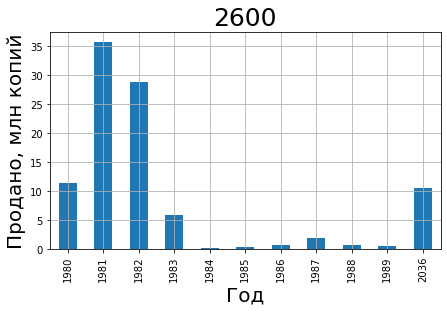

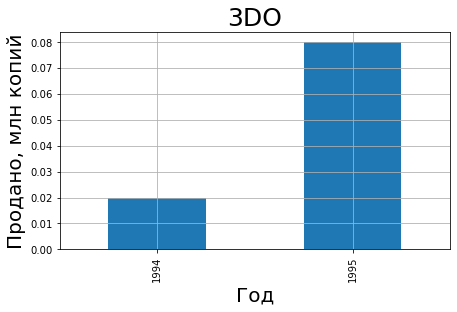

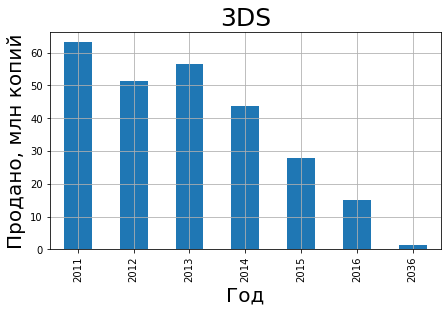

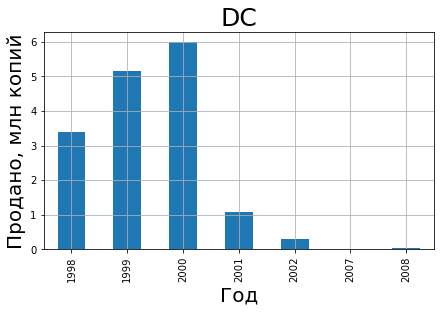

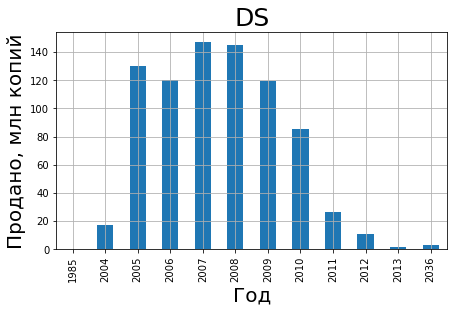

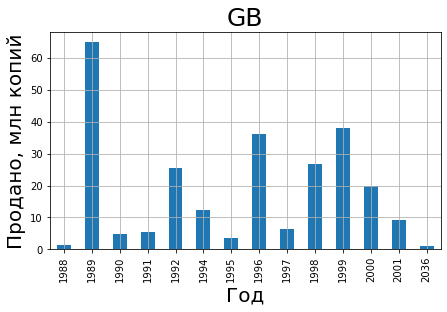

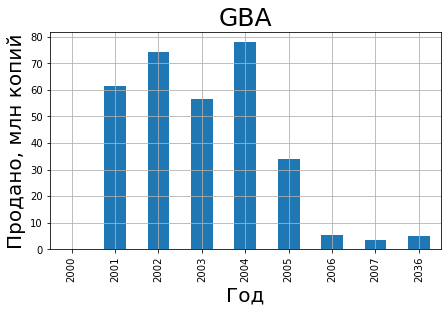

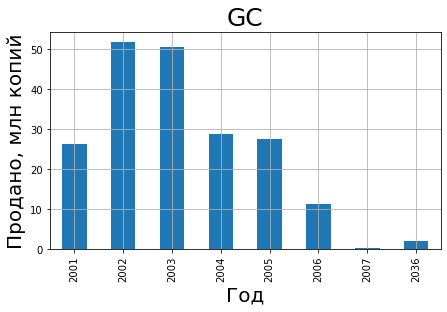

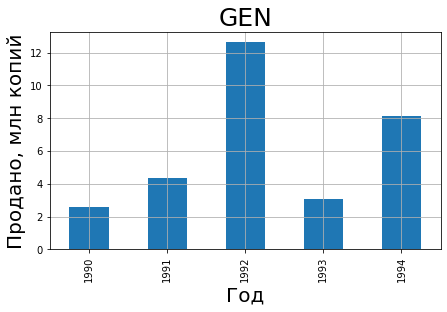

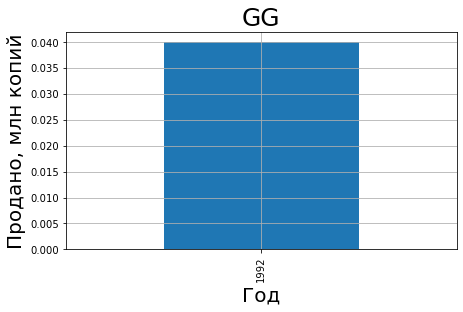

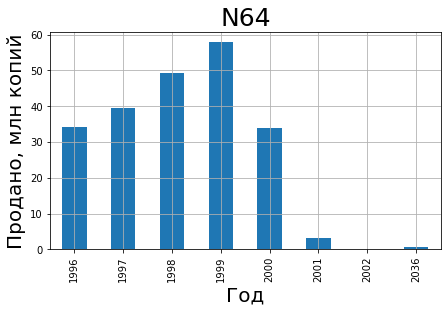

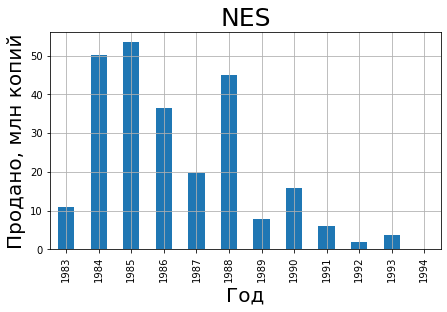

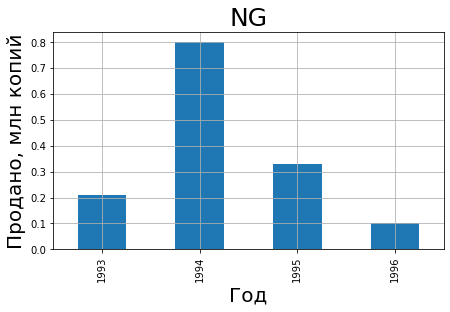

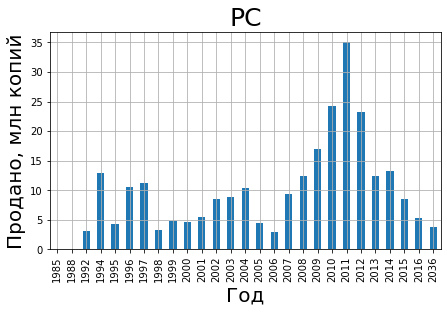

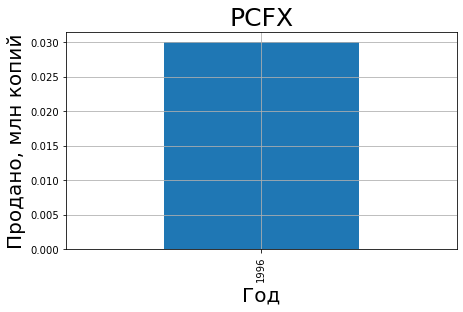

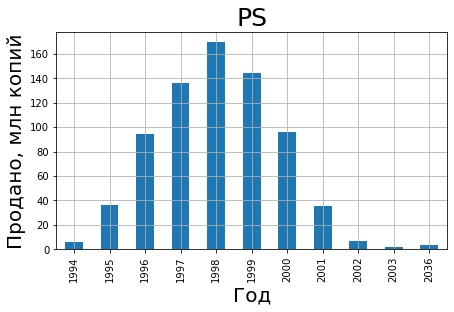

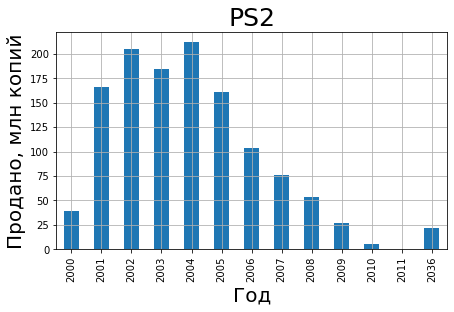

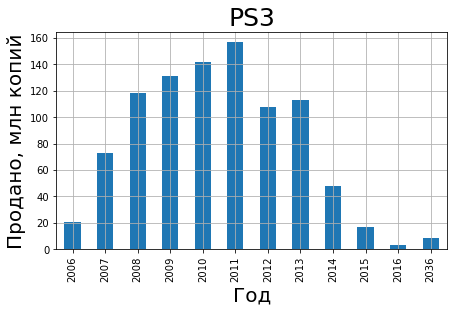

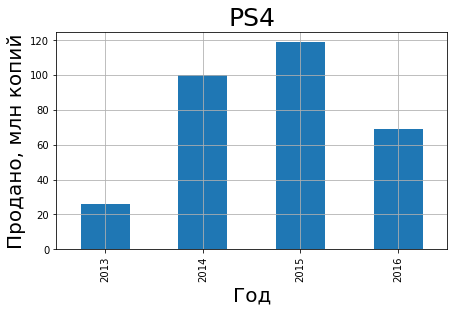

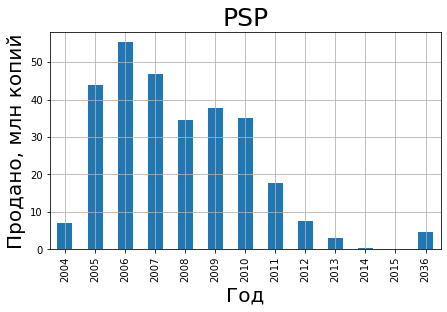

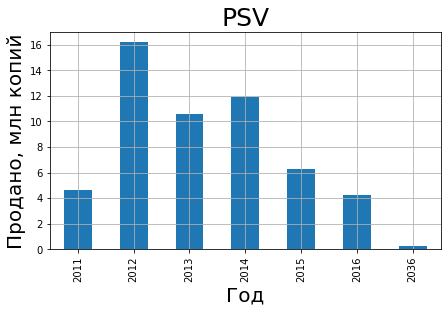

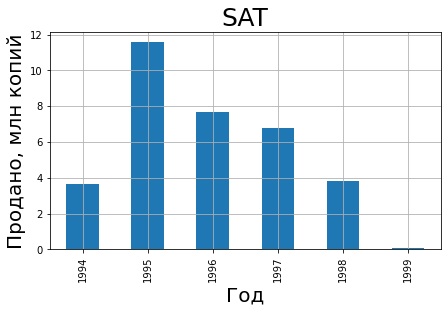

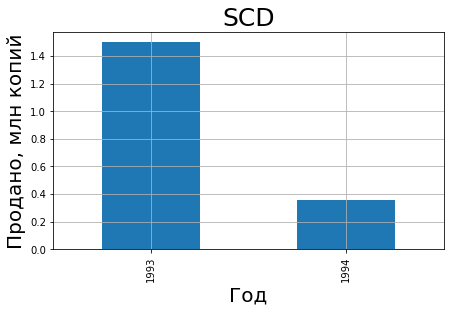

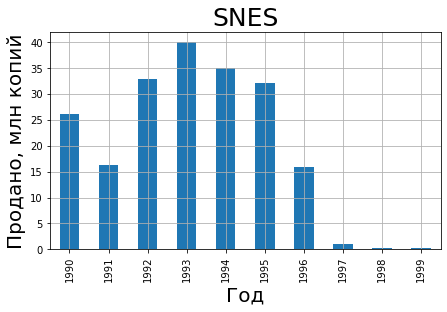

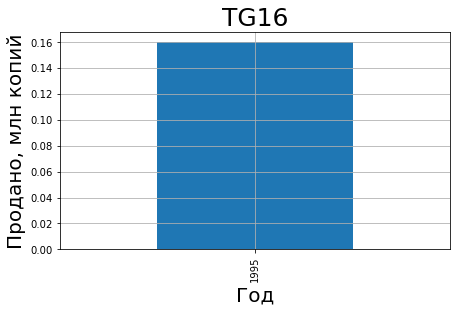

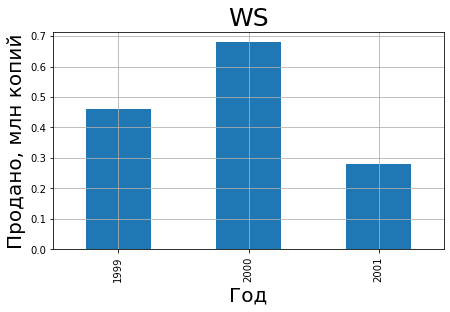

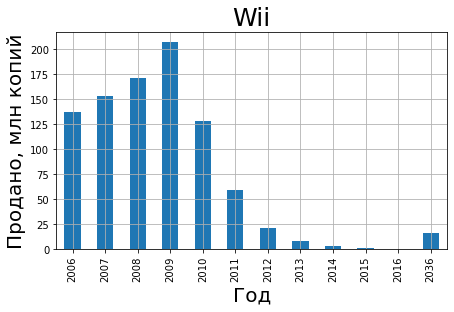

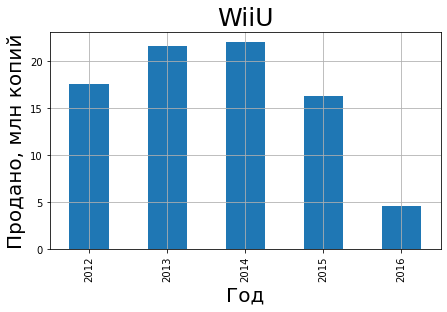

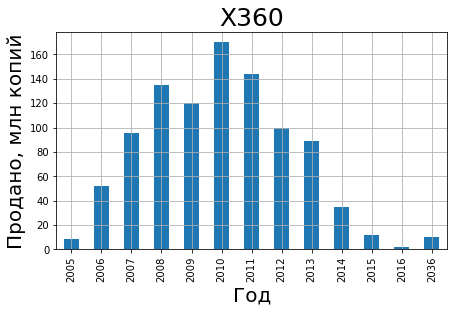

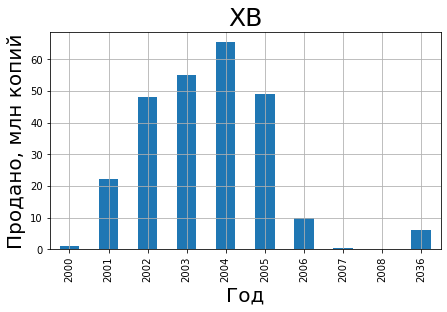

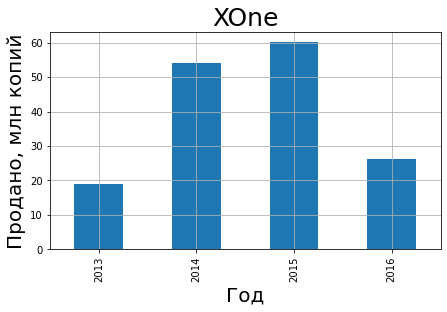

In [20]:
for name, platform_df in sales_platforms_and_year.groupby('platform'):
    platform_df.plot(y = 'sales',x = 'year', kind = 'bar', grid = True, legend = False, figsize = (7, 4))
    plt.title(name, loc = 'center', fontsize = 25)
    plt.ylabel('Продано, млн копий', size = 20)
    plt.xlabel('Год', size = 20)
    plt.show()

По этим гистограммам можно сказать следующее:
* PC беспорный лидер среди долгожителей, платформа актуальна всегда. 
* У консолей есть как затухающие проекты за несколько лет, так и актуальные 4-5 лет. 
* Многие игры, вероятно, остаются актуальные 2-3 года после выхода.
* **Средний цикл платформы примерно 5 лет, есть одно исключение это PC, у этой платформы нет срока годности =)**
* В нашем датасете изначальный период не корректный, так как он взят с начала зарождения игровой индустрии, а в то время было много эксперементальных платформ, так как было время формирования рынка, поэтому многие старные платформы не чем не помогут нашему анализу.

Окончательный вывовод мы сделаем следующий  - за актуальный период мы позьмем последние 5 лет, тоесть 2011 - 2016 год. Это будет оптимальный период для нашего дальнейшего анализа.

In [21]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


#### Посмотрим какие платформы лидируют по продажам и определим потенциальных лидеров

In [22]:
df_current = df.query('2011 <= year_of_release <= 2016')
df_current.info()
df_current.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4022 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4022 non-null   object 
 1   platform         4022 non-null   object 
 2   year_of_release  4022 non-null   int64  
 3   genre            4022 non-null   object 
 4   na_sales         4022 non-null   float64
 5   eu_sales         4022 non-null   float64
 6   jp_sales         4022 non-null   float64
 7   other_sales      4022 non-null   float64
 8   critic_score     1812 non-null   float64
 9   user_score       2032 non-null   float64
 10  rating           4022 non-null   object 
 11  total_sales      4022 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 408.5+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60


После фильтрации по актуальному периоду у нас получилось 4022 игры, помимо того, что мы поставили фильтр на актуальный период, также мы отсекли игры, где был пропущенные знаечения даты резила и мы из заменяли на 2036 год.

In [23]:
df_liders = df_current \
.pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'count').reset_index()
df_liders.head(10)

,platform,year_of_release,total_sales
0,3DS,2011,116
1,3DS,2012,93
2,3DS,2013,91
3,3DS,2014,80
4,3DS,2015,86
5,3DS,2016,46
6,DS,2011,153
7,DS,2012,23
8,DS,2013,8
9,PC,2011,139


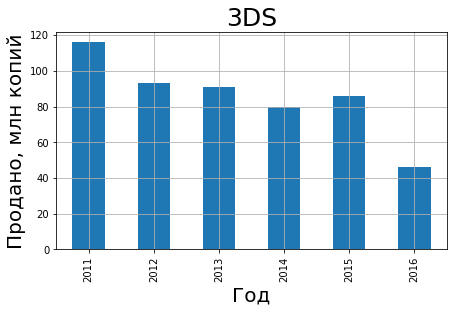

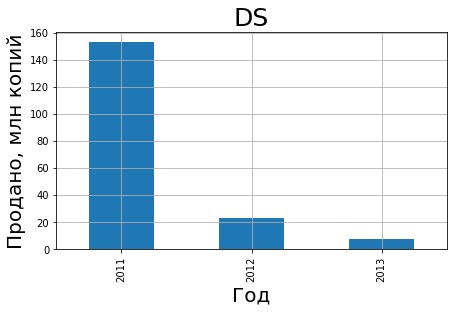

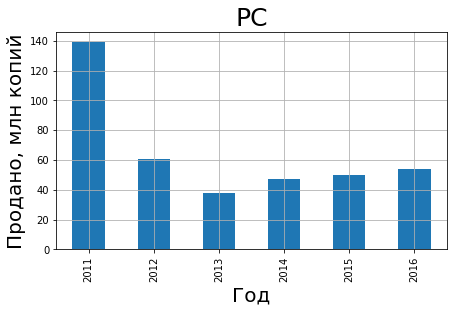

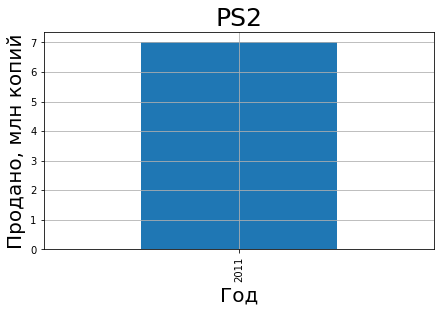

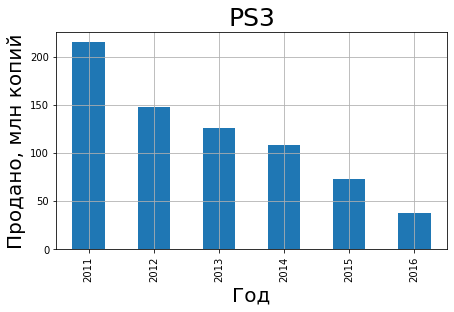

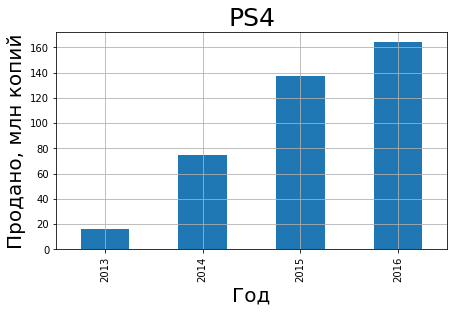

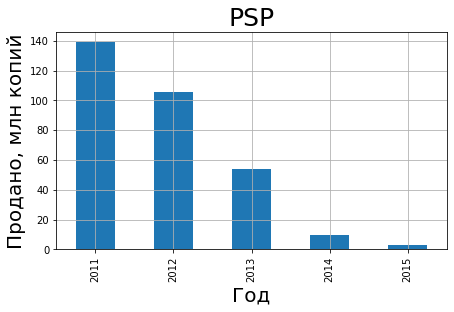

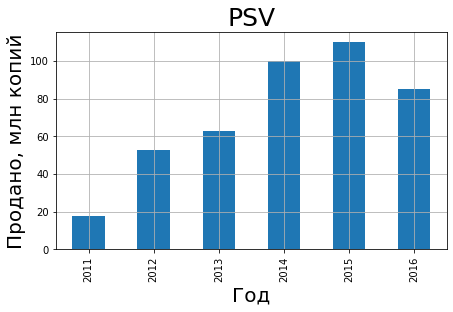

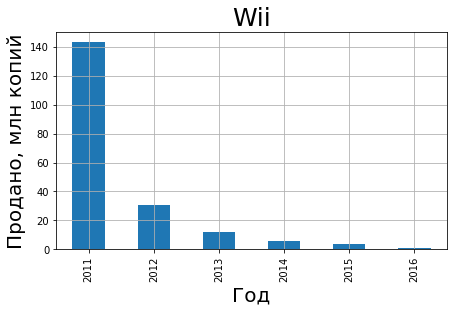

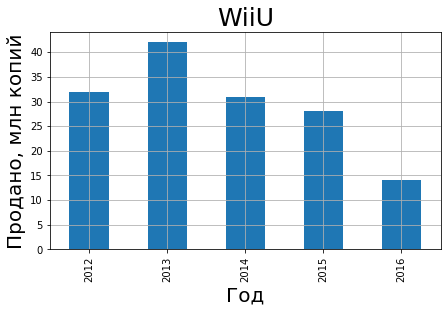

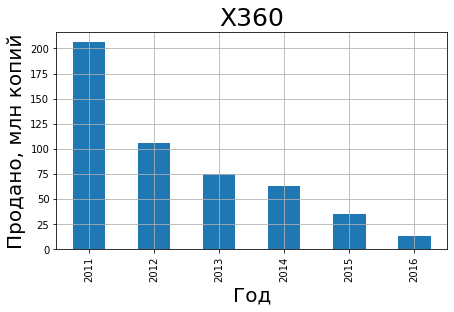

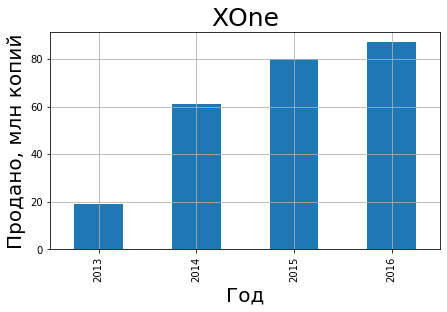

In [18]:
for name, platform_df in df_liders.groupby('platform'):
    platform_df.plot(y = 'total_sales',x = 'year_of_release', kind = 'bar', grid = True, legend = False, figsize = (7, 4))
    plt.title(name, loc = 'center', fontsize = 25)
    plt.ylabel('Продано, млн копий', size = 20)
    plt.xlabel('Год', size = 20)
    plt.show()

По получившимся гистограммам мы видим, что у нас есть платформы, которые уже теряю свою актуальность, например:
* DS
* PS2
* PS3
* PSP
* Wii
* X360
Это обусловлено тем, что это уже устаревшие платформы и на их смену пришли новые платформы. Например, PSP заменимал PSV. PS3 заменена на PS4 также как и X360 заменили на новую консоль XOne. Поэтому мы можем выдвинуть следующую гипотезу - лидерами по продажам у нас будут 3DS, PC, PS4, XOne, PSV. 

#### Посмотрим на график по глобальным продажам игр в разбивке по платформам

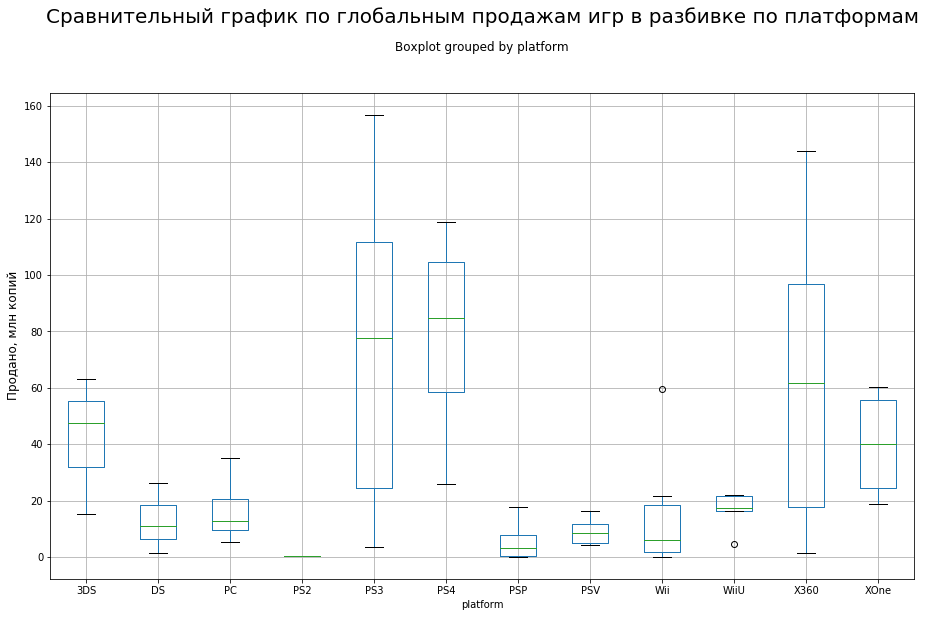

In [19]:
current_sales = df_current.pivot_table(index = ['platform', 'year_of_release'], 
                                       values = 'total_sales', aggfunc = 'sum').reset_index()
current_sales.columns = ['platform','year','sales']
current_sales.boxplot('sales', by='platform', grid = True, figsize = (15, 9))
plt.title('Сравнительный график по глобальным продажам игр в разбивке по платформам', loc = 'center', fontsize = 20, pad = 70)
plt.ylabel('Продано, млн копий', size = 12)
plt.show()


В предыдущем блоке мы выдвинули гипотезу о лидирующих платформах. Гипотеза не подтвердилась. Явный лидер это платформа PS3 за ней идет PS4, что не удивительно т.к многие релизы на PS3 были импортированы на PS4. На третьем и четвертом месте у нас находятся X360 и XOne. У этих платформ аналогичная ситуация как у у PS3 и PS4. Многие релизы на X360 были импортированы на Xone? что и дало новой консоли такой хороший старт продаж. Закрывает нашу пятурку лидеров платформа 3DS.

#### Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Для дальнейшего анализа мы возьмем платформу PC

In [20]:
pc_sales = df_current.query('platform == "PC"')
pc_sales.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
313,The Elder Scrolls V: Skyrim,PC,2011,Role-Playing,1.16,2.12,0.0,0.60,94.0,8.1,M,3.88
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
480,Star Wars: The Old Republic,PC,2011,Role-Playing,1.58,1.01,0.0,0.38,85.0,5.9,T,2.97
538,Battlefield 3,PC,2011,Shooter,0.89,1.43,0.0,0.46,89.0,7.5,M,2.78


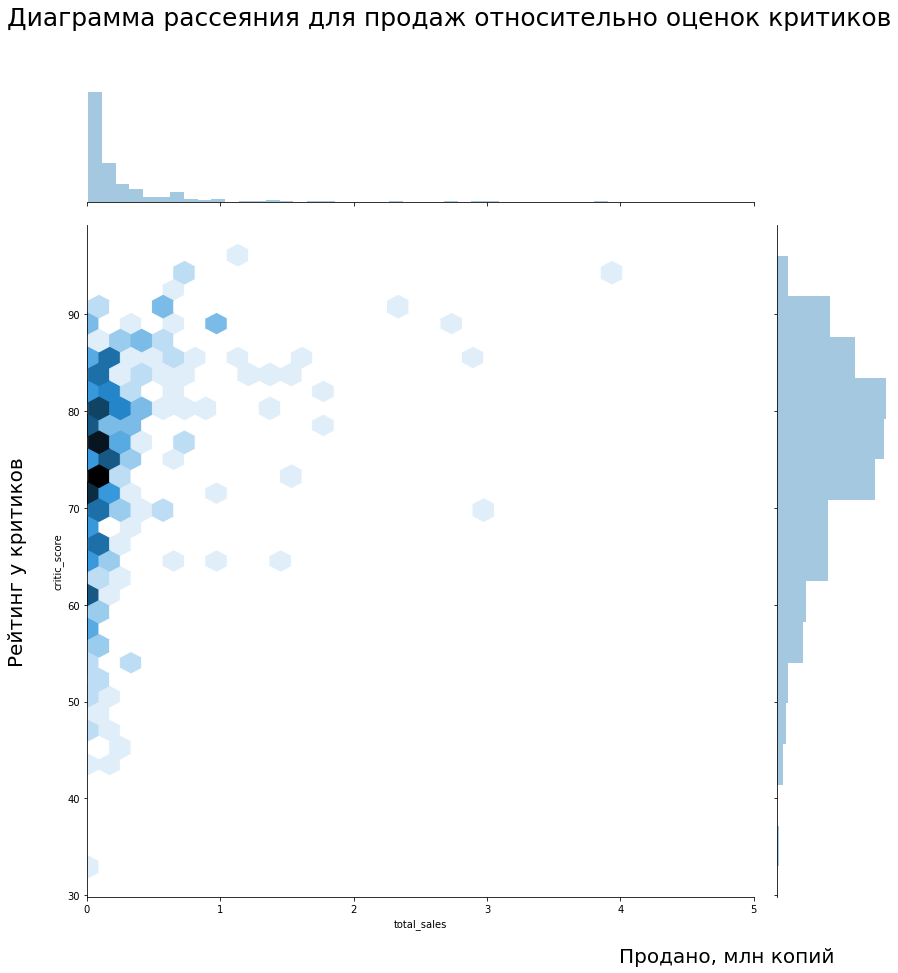

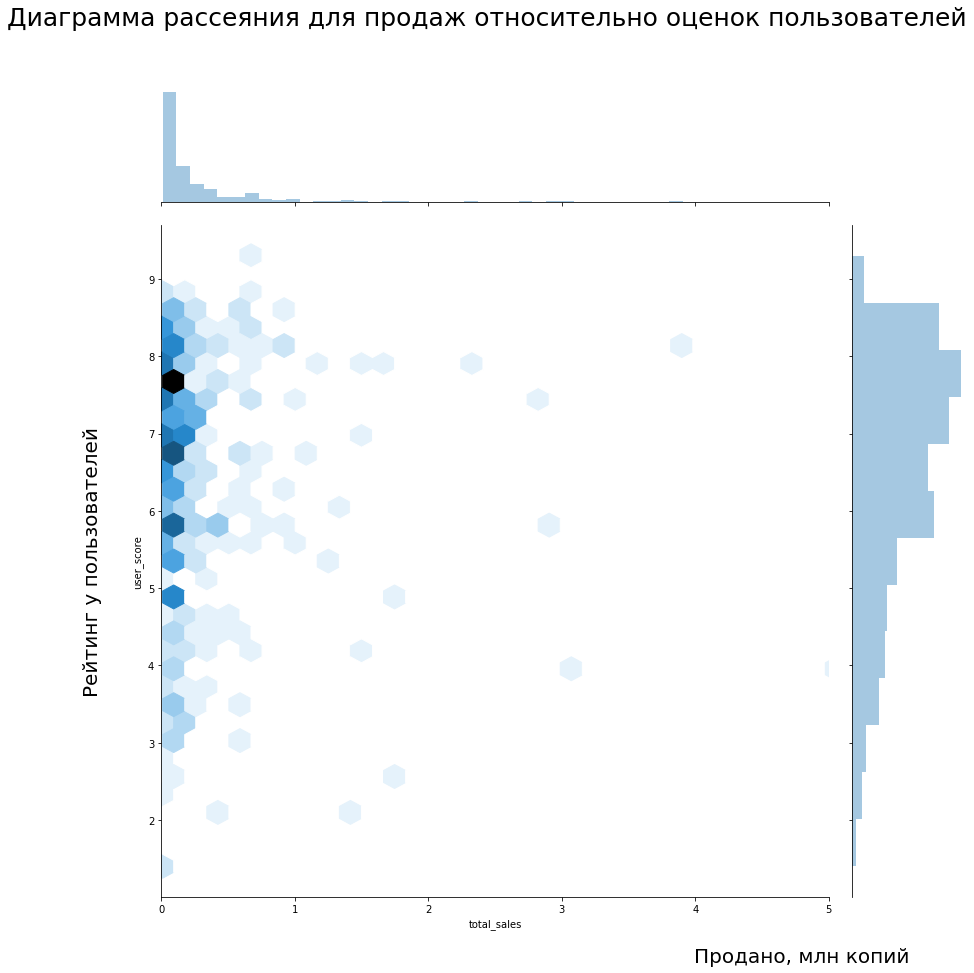

In [21]:
sns.jointplot(x = pc_sales['total_sales'], y = pc_sales['critic_score'], kind = 'hex', height=12, 
              xlim={0, 5}, ylim=None)
plt.title('Диаграмма рассеяния для продаж относительно оценок критиков', loc = 'right', fontsize = 25, pad = 200)
plt.xlabel('Продано, млн копий', size = 20, labelpad = 50, horizontalalignment = 'right')
plt.ylabel('Рейтинг у критиков', size = 20, labelpad = 750)
plt.show()
sns.jointplot(x = pc_sales['total_sales'], y = pc_sales['user_score'], kind = 'hex', height=12, 
              xlim={0, 5}, ylim=None)
plt.title('Диаграмма рассеяния для продаж относительно оценок пользователей', loc = 'right', fontsize = 25, pad = 200)
plt.xlabel('Продано, млн копий', size = 20, labelpad = 50, horizontalalignment = 'right')
plt.ylabel('Рейтинг у пользователей', size = 20, labelpad = 750)
plt.show()

По диаграммам мы можем сделать следующие выводы, критики чаще всего ставят оценки 73 и 77, а вот пользователи чаще ставят оценки примерно 76-76. По диаграммам рассеивания мы можем предположить, что корреляция оценок с продажами не будет. Для точно проверки постоим матрицу корреляции и посмотрим какая все же корреляция.

In [22]:
pc_sales_corr = pc_sales[['critic_score', 'user_score', 'total_sales']]
pc_sales_corr.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.464815,0.314185
user_score,0.464815,1.000000,-0.048967
total_sales,0.314185,-0.048967,1.000000


Интересная у нас получилась картина, корреляция оценок критиков и кол-вом продаж не большая коэффициент Пирсона равен 0,3. А вот корреляция оценок пользователей с кол-вом продаж очень маленькая, поэтому мы можем сделать вывод, что на кол-во продаж может повлять только оценка критиков. Для сравнения, посмотрим как у остальных платформ оценки критиков и пользователей коррелируют с кол-вом продаж. Сравним наши результаты с еще одной платформой и потом во всеми платформами в месте.

In [23]:
ps4_sales = df_current.query('platform == "PS4"')
ps4_sales_corr = ps4_sales[['critic_score', 'user_score', 'total_sales']]
ps4_sales_corr.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


У платформы PS4 коэффициет Пирсона немного больше, но все равно корреляция оценки критиков не сильно могут влият на кол-во продаж. А вот оценка пользователей как и у платформы PC практически не коррелирует с кол-вом продаж.

In [24]:
all_platforms = df_current[['critic_score', 'user_score', 'total_sales']]
all_platforms.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.534853,0.329977
user_score,0.534853,1.000000,0.031636
total_sales,0.329977,0.031636,1.000000


У всех платформ примерно одинаковый коэффициен Пирсона для **critic_score** и **total_sales**, поэтому мы можем сделать вывод, что оценка критиков немного влияет на кол-во продаж, а оценка пользователей практически не влият.

#### Посмотрим на общее распределение игр по жанрам

In [25]:
sales_genre = df_current.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(
    by = 'total_sales', ascending = False).reset_index()
sales_genre.columns = ['genre', 'sales']
sales_genre

,genre,sales
0,Action,557.80
1,Shooter,402.91
2,Role-Playing,245.63
3,Sports,237.15
4,Misc,139.42
5,Platform,88.68
6,Racing,88.31
7,Fighting,66.90
8,Simulation,50.26
9,Adventure,45.04


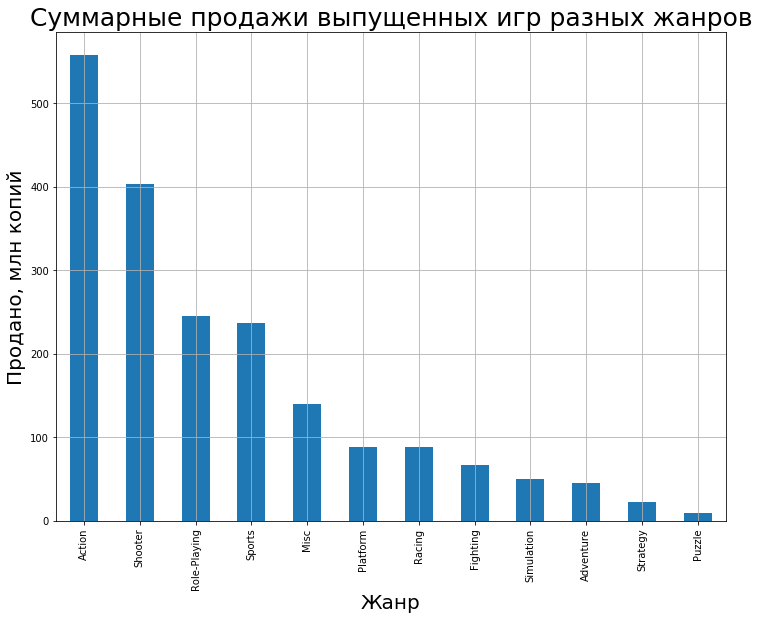

In [26]:
sales_genre.plot(y = 'sales', x = 'genre', kind = 'bar', grid = True,legend = False, figsize = (12,9))
plt.title('Суммарные продажи выпущенных игр разных жанров', loc = 'center', fontsize = 25)
plt.ylabel('Продано, млн копий', size = 20)
plt.xlabel('Жанр', size = 20)
plt.show()

Первые три места у нас занимают жанры **Action**, **Shooter**, **Role_playing**. Четвертое место у нас занимает жанр **Sport**. Посмотри какая будет ситуация если мы рассмотрим средние продажи по жанрам.

In [27]:
sales_genre_mean = df_current.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'mean').sort_values(
    by = 'total_sales', ascending = False).reset_index()
sales_genre_mean.columns = ['genre', 'sales']
sales_genre_mean

,genre,sales
0,Shooter,1.224650
1,Platform,0.726885
2,Sports,0.609640
3,Role-Playing,0.528237
4,Racing,0.490611
5,Action,0.439559
6,Fighting,0.420755
7,Misc,0.371787
8,Simulation,0.369559
9,Strategy,0.189402


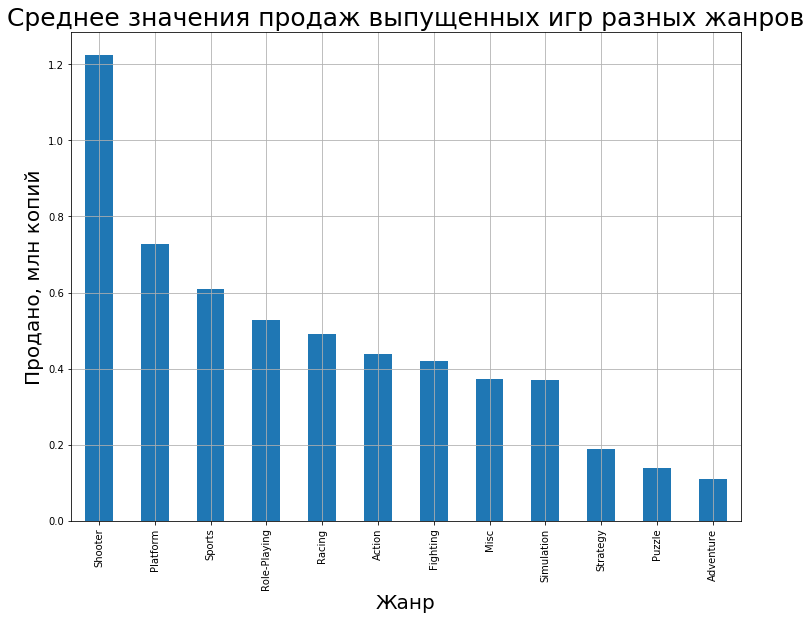

In [28]:
sales_genre_mean.plot(y = 'sales', x = 'genre', kind = 'bar', grid = True,legend = False, figsize = (12,9))
plt.title('Среднее значения продаж выпущенных игр разных жанров', loc = 'center', fontsize = 25)
plt.ylabel('Продано, млн копий', size = 20)
plt.xlabel('Жанр', size = 20)
plt.show()

Вот у нас и поменялись лидеры. Первые пять жанров на которые стоит обратить внимание:
* Shooter
* Platform
* Sports
* Role-playing
* Racing

Не плохие результаты показывают жарны **Action** и **Fighting** их тоже можно рассмотреть как потенциальные, но не делать такой сильно упор как на пятерку лидеров.

### Составим портрет пользователя каждого региона(NA, EU, JP)

In [29]:
df_current.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60


In [30]:
na_users = df_current.query('na_sales != 0')
eu_users = df_current.query('eu_sales != 0')
jp_users = df_current.query('jp_sales != 0')
display(len(na_users), len(eu_users), len(jp_users))

2433

2547

2006

#### Посмотрим какие самые популярные(топ-5) платформы в разных регионах

In [31]:
na_top5_platforms = na_users.groupby('platform')['na_sales'].sum().reset_index()
na_top5_platforms.sort_values(by = 'na_sales', ascending = False).head(5)

,platform,na_sales
10,X360,226.80
4,PS3,168.26
5,PS4,108.74
11,XOne,93.12
0,3DS,82.65


In [32]:
eu_top5_platforms = eu_users.groupby('platform')['eu_sales'].sum().reset_index()
eu_top5_platforms.sort_values(by = 'eu_sales', ascending = False).head(5)

,platform,eu_sales
4,PS3,163.10
5,PS4,141.09
10,X360,117.10
0,3DS,61.27
2,PC,56.70


In [33]:
jp_top5_platforms = jp_users.groupby('platform')['jp_sales'].sum().reset_index()
jp_top5_platforms.sort_values(by = 'jp_sales', ascending = False).head(5)

,platform,jp_sales
0,3DS,100.62
3,PS3,49.39
5,PSP,24.04
6,PSV,21.84
4,PS4,15.96


В Америке первое место занимамет занимает Xbox360, второе и третье место занимают консоли PS3 и PS4. 
Только на четвертом месте мы видим XboxOne и закрывает наш топ-5 Nintendo 3DS. В Европе ситуация другая на первом месте консоль PS3, на втором PS4 и только на третьем месте мы видим Xbox360. За ним на четвертом месте стоит Nintendo 3DS и закрывает то PC.
Японские пользователи удивляют они предпочитают только платформы отечественного производства, но и доли продаж у них самые низкие, например, на первом месте в Японии Nintendo 3DS с кол-вом продаж 100 млн и такой же показатель в Америке у PS4, где эта консоль занимает 3 место. 

#### Посмотрим какие самые популярные жанры (топ-5) в разных регионах

In [34]:
na_top5_ganre = na_users.groupby('genre')['na_sales'].sum().reset_index()
na_top5_ganre.sort_values(by = 'na_sales', ascending = False).head(5)

,genre,na_sales
0,Action,230.92
8,Shooter,194.43
10,Sports,108.70
7,Role-Playing,83.78
3,Misc,69.69


In [35]:
eu_top5_ganre = eu_users.groupby('genre')['eu_sales'].sum().reset_index()
eu_top5_ganre.sort_values(by = 'eu_sales', ascending = False).head(5)

,genre,eu_sales
0,Action,199.12
8,Shooter,148.02
10,Sports,88.48
7,Role-Playing,62.30
6,Racing,40.58


In [36]:
jp_top5_ganre = jp_users.groupby('genre')['jp_sales'].sum().reset_index()
jp_top5_ganre.sort_values(by = 'jp_sales', ascending = False).head(5)

,genre,jp_sales
7,Role-Playing,79.87
0,Action,63.62
3,Misc,17.60
2,Fighting,12.38
4,Platform,12.13


С жанрами ситуация обстоит иначе, в Америке и Европе топ-5 жанров практические одинаковые(отличаются, только последняя пятая позиция), а вот в Японии все иначе. Из-за того, что в Японии самая популярная плтформа это Nintendo 3DS она и будет диктовать какие топ 5 жанров мы увидим. 

#### Посмотрим влияел ли рейтинг ESRB на продажи в разных регионах(NA, EU, JP)


В самом начале мы заменили пропушенные значение в возрастном рейтинге игр на RP что означает  - «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

In [37]:
na_rating = na_users.groupby('rating')['na_sales'].sum().reset_index()
na_rating = na_rating.sort_values(by = 'na_sales', ascending = False)
na_rating

,rating,na_sales
3,M,308.45
0,E,170.17
4,RP,123.69
1,E10+,117.72
5,T,109.31
2,EC,0.42


В Америке на **первом** месте игры с рейтингом «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. На **втором** месте игры с рейтингом «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше. На **третьем** месте игры с рейтингом  «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. На **четвертом** месте игры с рейтингом «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови. На **пятом** месте игры с рейтингом «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. На **шестом** месте игры с рейтингом «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими.

In [38]:
eu_rating = eu_users.groupby('rating')['eu_sales'].sum().reset_index()
eu_rating = eu_rating.sort_values(by = 'eu_sales', ascending = False)
eu_rating

,rating,eu_sales
2,M,250.26
0,E,141.73
3,RP,116.64
4,T,83.16
1,E10+,78.00


В Евроме на **первом** месте игры с рейтингом «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. На втором месте игры с рейтингом На **втором** месте игры с рейтингом «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше. На **третьем** месте игры с рейтингом «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. На **четвертом** месте игры с рейтингом «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. На **пятом** месте игры с рейтингом «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови. И на последнем месте игры у которых еще нет рейтинга.

In [39]:
jp_rating = jp_users.groupby('rating')['jp_sales'].sum().reset_index()
jp_rating = jp_rating.sort_values(by = 'jp_sales', ascending = False)
jp_rating

,rating,jp_sales
3,RP,138.21
0,E,36.68
4,T,33.39
2,M,26.14
1,E10+,11.23


Япония как всегда отличается от остального мира.На **первом** месте игры с рейтингом «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. На **втором** месте у них игры с рейтингом «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. На **третьем** месте игры с рейтингом «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. На **четвертом** месте игры с рейтингом «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. На **пятом** месте игры с рейтингом «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови. И на последнем месте игры у которых еще нет рейтинга. Возможно, такое распределение в Японии связано с их любовью к мультфильмам, так назваемым аниме.

### Проверим гипотезы

**Первая гипотеза** - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Сформулируем нулевую и альтернативную гипотезу:
* Нулевая гипотеза (Н0) - средние значение пользовательского рейтинга для платформ Xbox One и PC равны.
* Альтернативная гипотеза (Н1) - среднее значение пользовательского рейтина для платформ Xbox One и PC отличаются.

In [40]:
user_score_xbox = df_current.query('platform == "XOne" and user_score !=0 and user_score != "NaN"')
user_score_pc = df_current.query('platform == "PC" and user_score !=0 and user_score != "NaN"')

In [41]:
alpha = 0.05

results = st.ttest_ind(user_score_xbox['user_score'], user_score_pc['user_score'], equal_var = True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отклонить нулевую гипотезу")


p-значение: 0.6267602271422398
Нет оснований отклонить нулевую гипотезу


**Вторая гипотеза** - Средние пользовательские рейтинги жанров Action и Sports разные. Сформулируем нулевую и альтернативную гипотезу:
* Нулевая гипотеза (Н0) - среднее значение пользовтельского рейтинга жанра Action и жанра Sorts равны.
* Альтернативная гипотеза (Н1) - среднее значение пользовательского рейтина жанра Action и жанра Sports отличаются.

In [42]:
user_score_action = df_current.query('genre == "Action" and user_score !=0 and user_score != "NaN"')
user_score_sports = df_current.query('genre == "Sports" and user_score !=0 and user_score != "NaN"')

In [43]:
alpha = 0.05

results = st.ttest_ind(user_score_action['user_score'], user_score_sports['user_score'], equal_var = True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отклонить нулевую гипотезу")

p-значение: 5.1974550252152054e-24
Отвергаем нулевую гипотезу


### Вывод

Что ж, подведем итоги. Для того, чтобы выстроить правильную рекламную компанию на 2017 год стоит обращать внимание на следующие факторы:
* В Японии рынок отличается от остальных. В этом регионе предпочитают платформы японского производства. Самыми популярными являются кортативные консоли, также японцы предпочитают играть в RPG, Экшен и музыкальные игры. В Японии предпочитают игры с уменьшеным кол-во насилия, поэтому стоит обратить внимание на игровой рейтинг игр.

* В Америке пользователи предпочитают платформу Xbox, стоит сделать упор именного на нее, но не зыбывать и про платформу Sony так как они давние конкуренты с Xbox и именно в этом регионе их продажи хорошо себя показывают. Самый популярный жарн игр это Экшен, Шутеры и Спортивные игры. Также американцы предпочитают игры с возрастным ограничением 17+ стоит и на это обратить внимание.

* В Европе рынок схож с Америкой. Европейцы предпочитают платформы Sony и Xbox, вот только платфомы Sony побеждают Xbox. Предпочтения по жанрам в Европе Экшен, Шутеры и Спортивные игры. Как и американцы европейцы не оставляю без внимания спортивный жанр. Игры с возрастным рейтингом "М" отлично продаются в данном регионе.

* Оценки критиков мало влияют на покупательский спрос, а вот оценки пользователей практически не влияют.

* Не стоит оставлять без внимания платформу PC, так как наше исследование показало, что средний жизненый цикл других платформ примерно 5 лет, а вот платформа PC не имеет такого жизненого цикла.